[*********************100%***********************]  10 of 10 completed


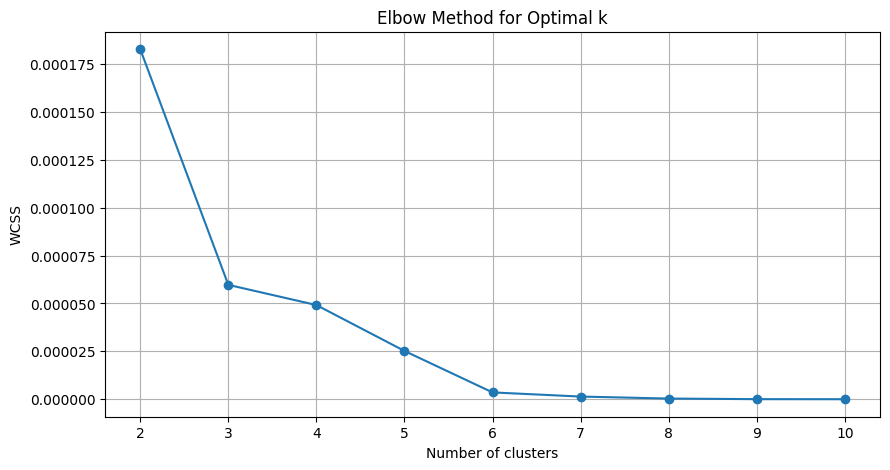

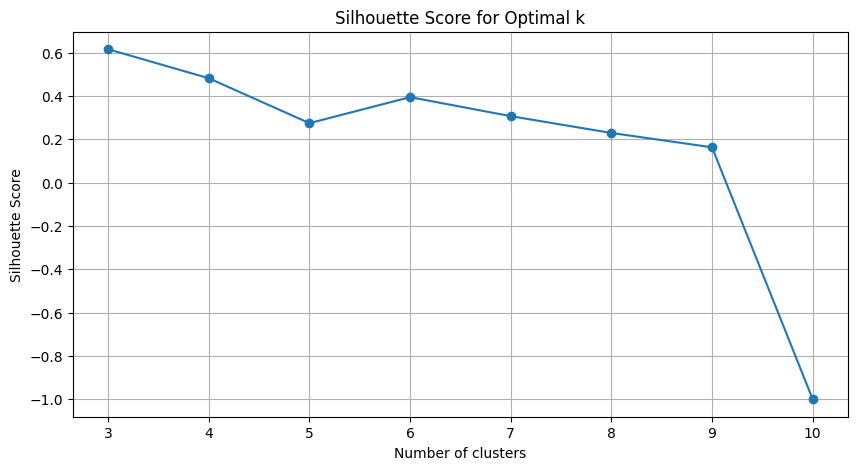

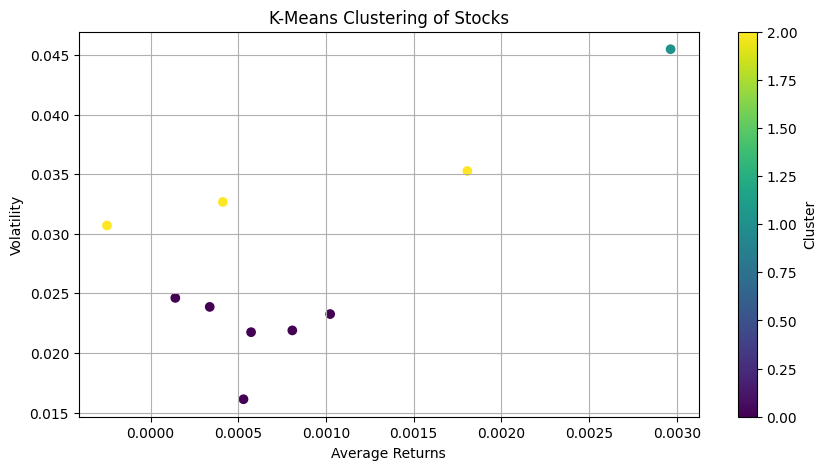

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Step 1: Data Collection
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'META', 'NFLX', 'NVDA', 'BRK-B', 'JPM']
data = yf.download(tickers, start='2020-01-01', end='2023-01-01')['Adj Close']

# Fill missing values with forward fill method
data = data.ffill()

# Step 2: Data Preprocessing
# Calculate daily returns
returns = data.pct_change().dropna()

# Compute volatility (standard deviation of returns)
volatility = returns.std()

# Create a DataFrame for features
features = pd.DataFrame({
    'Returns': returns.mean(),
    'Volatility': volatility
})

# Ensure there are no NaN values in features
features = features.dropna()

# Step 3: Feature Selection
X = features.values

# Step 4: Identify the optimal number of clusters
wcss = []
silhouette_scores = []
k_values = range(2, min(11, len(X) + 1))  # Start from 2 to avoid silhouette score error

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    # Ensure we only calculate silhouette score for valid clusters
    unique_labels = set(kmeans.labels_)

    if len(unique_labels) > 1 and len(unique_labels) < len(X):  # Ensure valid number of clusters
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)  # Append -1 if not enough clusters to compute score

# Step 5: Plot Elbow Method and Silhouette Scores
# Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.grid()
plt.show()

# Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(k_values[1:], silhouette_scores[1:], marker='o')  # Exclude the first value for silhouette scores
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(k_values[1:])
plt.grid()
plt.show()

# Step 6: Fit K-Means with the optimal number of clusters
optimal_k = 3  # Replace with the optimal value from Elbow and Silhouette methods
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
features['Cluster'] = kmeans.fit_predict(X)

# Step 7: Visualization
plt.figure(figsize=(10, 5))
plt.scatter(features['Returns'], features['Volatility'], c=features['Cluster'], cmap='viridis', marker='o')
plt.title('K-Means Clustering of Stocks')
plt.xlabel('Average Returns')
plt.ylabel('Volatility')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()
